In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("heartDisease.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df1 = df

In [6]:
dum1 = pd.get_dummies(df1['ChestPainType'])
dum2 = pd.get_dummies(df1['RestingECG'])
dum3 = pd.get_dummies(df1['ExerciseAngina'])
dum4 = pd.get_dummies(df1['ST_Slope'])
dum5 = pd.get_dummies(df1['Sex'])

In [7]:
pd.options.display.max_columns = 50

In [8]:
conDf1 = pd.concat([df1,dum1,dum2,dum3,dum4,dum5],axis="columns")
conDf1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up,F,M
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1


In [9]:
myDF1 = conDf1.drop(["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],axis="columns")
myDF1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up,F,M
0,40,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1
3,48,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1


In [10]:
df1['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [11]:
myCols = ["Age","F","M","ATA","NAP","ASY","TA","RestingBP","Cholesterol","FastingBS",
"Normal","ST","LVH","MaxHR","N","Y","Oldpeak","Up","Flat","Down","HeartDisease"]
myDF1 = myDF1.reindex(columns=myCols)
myDF1.head()

,Age,F,M,ATA,NAP,ASY,TA,RestingBP,Cholesterol,FastingBS,Normal,ST,LVH,MaxHR,N,Y,Oldpeak,Up,Flat,Down,HeartDisease
0,40,0,1,1,0,0,0,140,289,0,1,0,0,172,1,0,0.0,1,0,0,0
1,49,1,0,0,1,0,0,160,180,0,1,0,0,156,1,0,1.0,0,1,0,1
2,37,0,1,1,0,0,0,130,283,0,0,1,0,98,1,0,0.0,1,0,0,0
3,48,1,0,0,0,1,0,138,214,0,1,0,0,108,0,1,1.5,0,1,0,1
4,54,0,1,0,1,0,0,150,195,0,1,0,0,122,1,0,0.0,1,0,0,0


In [12]:
a_log = myDF1.drop(["HeartDisease"],axis="columns") #log for logistic 
b_log = myDF1["HeartDisease"]

In [13]:
a_log.head()

,Age,F,M,ATA,NAP,ASY,TA,RestingBP,Cholesterol,FastingBS,Normal,ST,LVH,MaxHR,N,Y,Oldpeak,Up,Flat,Down
0,40,0,1,1,0,0,0,140,289,0,1,0,0,172,1,0,0.0,1,0,0
1,49,1,0,0,1,0,0,160,180,0,1,0,0,156,1,0,1.0,0,1,0
2,37,0,1,1,0,0,0,130,283,0,0,1,0,98,1,0,0.0,1,0,0
3,48,1,0,0,0,1,0,138,214,0,1,0,0,108,0,1,1.5,0,1,0
4,54,0,1,0,1,0,0,150,195,0,1,0,0,122,1,0,0.0,1,0,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

a_log["Age"] = scaler.fit_transform(a_log[["Age"]])
a_log["RestingBP"] = scaler.fit_transform(a_log[["RestingBP"]])
a_log["Cholesterol"] = scaler.fit_transform(a_log[["Cholesterol"]])
a_log["MaxHR"] = scaler.fit_transform(a_log[["MaxHR"]])
a_log["Oldpeak"] = scaler.fit_transform(a_log[["Oldpeak"]])
a_log.head()

,Age,F,M,ATA,NAP,ASY,TA,RestingBP,Cholesterol,FastingBS,Normal,ST,LVH,MaxHR,N,Y,Oldpeak,Up,Flat,Down
0,0.244898,0,1,1,0,0,0,0.70,0.479270,0,1,0,0,0.788732,1,0,0.295455,1,0,0
1,0.428571,1,0,0,1,0,0,0.80,0.298507,0,1,0,0,0.676056,1,0,0.409091,0,1,0
2,0.183673,0,1,1,0,0,0,0.65,0.469320,0,0,1,0,0.267606,1,0,0.295455,1,0,0
3,0.408163,1,0,0,0,1,0,0.69,0.354892,0,1,0,0,0.338028,0,1,0.465909,0,1,0
4,0.530612,0,1,0,1,0,0,0.75,0.323383,0,1,0,0,0.436620,1,0,0.295455,1,0,0


In [15]:
from sklearn.model_selection import train_test_split
a_log_train, a_log_test, b_log_train, b_log_test = train_test_split(a_log,b_log,test_size=0.2)

In [16]:
print("Length of training data set: ",len(a_log_train))
print("Length of testing data set: ",len(a_log_test))

Length of training data set:  734
Length of testing data set:  184


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(a_log_train,b_log_train)

LogisticRegression()

In [19]:
print("Accuracy: ",model.score(a_log_test,b_log_test)*100,"%")

Accuracy:  83.69565217391305 %


In [20]:
model.predict(a_log_test)

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

Now we will apply PCA technique on our 'a_log' data:

In [21]:
a_log.head()

,Age,F,M,ATA,NAP,ASY,TA,RestingBP,Cholesterol,FastingBS,Normal,ST,LVH,MaxHR,N,Y,Oldpeak,Up,Flat,Down
0,0.244898,0,1,1,0,0,0,0.70,0.479270,0,1,0,0,0.788732,1,0,0.295455,1,0,0
1,0.428571,1,0,0,1,0,0,0.80,0.298507,0,1,0,0,0.676056,1,0,0.409091,0,1,0
2,0.183673,0,1,1,0,0,0,0.65,0.469320,0,0,1,0,0.267606,1,0,0.295455,1,0,0
3,0.408163,1,0,0,0,1,0,0.69,0.354892,0,1,0,0,0.338028,0,1,0.465909,0,1,0
4,0.530612,0,1,0,1,0,0,0.75,0.323383,0,1,0,0,0.436620,1,0,0.295455,1,0,0


In [22]:
a_log.shape

(918, 20)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
a_log_pca = pca.fit_transform(a_log)
a_log_pca.shape

(918, 10)

As we can in above two cells that number of columns decrease from 20 to 10 after applying PCA technique

In [24]:
pca.explained_variance_ratio_

array([0.29706549, 0.12659259, 0.11224756, 0.10030777, 0.08606108,
       0.07150532, 0.0641378 , 0.05429501, 0.03176066, 0.02123586])

In [25]:
aPca_log_train, aPca_log_test, b_log_train, b_log_test = train_test_split(a_log_pca,b_log,test_size=0.2)

In [26]:
model2 = LogisticRegression()
model2.fit(aPca_log_train, b_log_train)
print("Accuracy: ",model2.score(aPca_log_test,b_log_test)*100,"%")

Accuracy:  87.5 %


In [27]:
b_log_test

34     0
183    0
534    1
480    1
360    1
      ..
291    0
593    1
144    1
53     0
301    0
Name: HeartDisease, Length: 184, dtype: int64

In [28]:
model2.predict(aPca_log_test)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = model2.predict(aPca_log_test)
cm = confusion_matrix(b_log_test,y_pred)
cm

array([[67, 14],
       [ 9, 94]], dtype=int64)

Text(69.0, 0.5, 'Actual')

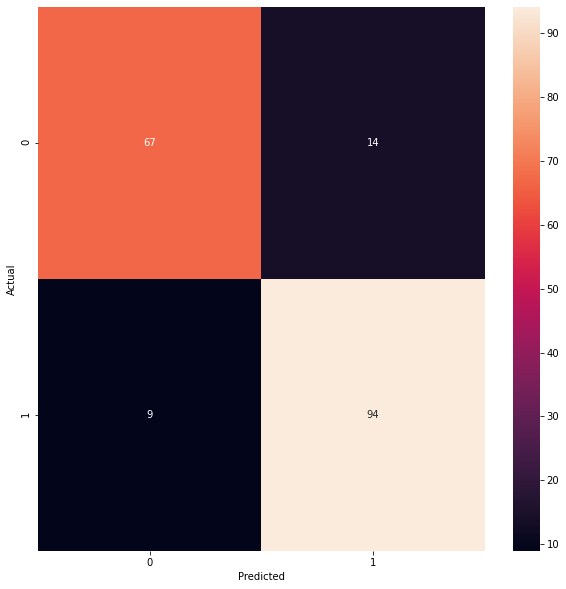

In [30]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")